# Generative Adversarial Networks
 
In this notebook we build a very simple pair of GANs.
 - The dataset is a dataset of 2x2 black and white images, where the images we want to generate are backwards diagonals (\)
 - The neural networks only have one layer.

In [1]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

## Plotting function

In [3]:
#Drawing Function

def view_samples(samples,m,n):
    fig, axes=plt.subplots(figsize=(10,10),nrows=m,ncols=n,sharey=True,sharex=True)
    for ax,img in zip(axes.flatten(),samples):
        #ax.xaxis.set_visible(False)
        #ax.yaxis.set_visible(False)
        im=ax.imshow(1-img.reshape(2,2),cmap='Greys_r')
    return fig,axes

## Examples of Images

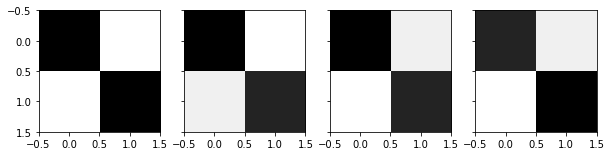

In [4]:
images=[np.array([1,0,0,1]),
       np.array([0.9,0.1,0.2,0.8]),
       np.array([0.9,0.2,0.1,0.8]),
       np.array([0.8,0.2,0.1,0.9])]
_=view_samples(images,1,4)

## Examplesof noise
The following are randomly generated images

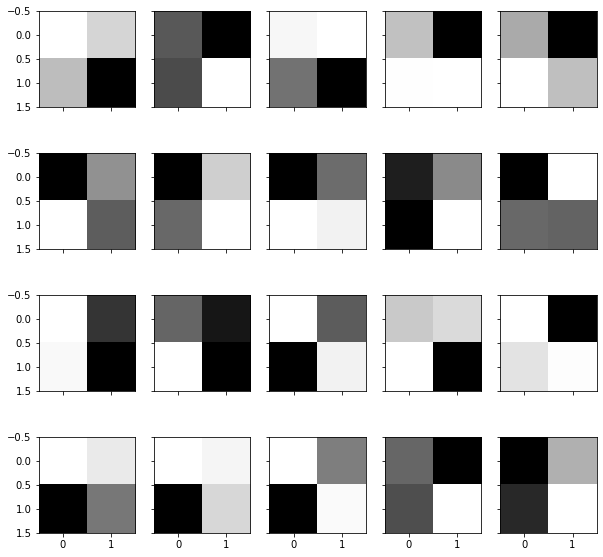

In [13]:
noise=[np.random.randn(2,2) for i in range(20)]

#np.random.random() Return random floats in the half-open interval [0.0, 1.0)
def generate_random_image():
    return [np.random.random(), np.random.random(),np.random.random(),np.random.random()]

_=view_samples(noise,4,5)
#print(generate_random_image())

## Building the neural networks

In [15]:
#The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

## The Discriminator

In [51]:
class Discriminator():
    def __init__(self):
        self.weights=np.array([np.random.normal() for i in range(4)])
        self.bias=np.array([np.random.normal() for i in range(4)])
        
    def forward(self,z):
        #forward propagation
        return sigmoid(np.dot(z,self.weights)+self.bias)
    
# When the discriminator predict the image is real,so it wants to be 1, so error is -log(prediction)
    def error_from_image(self,image):
        prediction=self.forward(image)
        return -np.log(prediction)

# For backpropagation for real image : W:- -image(1-prediction) b: -(1-prediction)
    def derivatives_for_image(self,image):
        prediction=self.forward(image)
        weights_derivative= -image(1-prediction)
        bias_derivative=-(1-prediction)
        return weights_derivative, bias_derivative

#Update weights and bias from derivative   
    def update_from_image(self,z):
        dervs=derivatives_for_image(z)
        self.weights -=learning_rate*dervs[0]
        self.bias -=learning_rate*dervs[0]

# When the discriminator predict the image is fake ,so it wants to be 0 , so error is -log(1-prediction)         
    def error_from_noise(self,noise):
        prediction=self.forward(noise)
        return -np.lof(1-prediction)

# For Backpropagation for fake image generated by generator : W: noise_image*prediction , b: prediction 
    def defivative_for_noise(self,noise):
        prediction=self.forward(noise)
        weights_derivative= noise*prediction
        bias_derivative= prediction
        return weights_derivative, bias_derivative
    
#Update weights and bias from derivative
    def update_from_noise(self,noise):
        dervs= self.defivative_for_noise(noise)
        self.weights -=learning_rate*dervs[0]
        self.bias -=learning_rate*dervs[1]
      

## The generator

In [56]:
class Generator():
    def __init__(self):
        self.weights=np.array([np.random.normal() for i in range(4)])
        self.bias=np.array([np.random.normal() for i in range(4)])
        
    def forward(self,z):
        #forward propagation
        return sigmoid(z*self.weights + self.bias)
    
    def error(self,z,discriminator):
        x=self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y= discriminator.forward(x)
        return -np.log(y)
    
    def derivatives(self,z,discriminator):
        discriminator_weights=discriminator.weights
        discriminator_bias=discriminator.bias
        x=self.forward(z)
        y=discriminator.forward(x)
        factor= -(1-y)*discriminator_weights*x*(1-x)
        weights_derivative=factor*z
        bias_derivative=factor
        return weights_derivative, bias_derivative
    
    def update(self,z,discriminator):
        error_before=self.error(z,discriminator)
        dervs=self.derivatives(z,discriminator)
        self.weights -=learning_rate*dervs[0]
        self.bias -=learning_rate*dervs[1]
        error_after=self.error(z,discriminator)
         
    

## Training

In [58]:
#set random seed
np.random.seed(10)

# Hyperameters
learning_rate=0.01
epochs=1000

# The GAN
D = Discriminator()
G = Generator()

#For the error plot
error_discriminator=[]
error_generator=[]

for epoch in range(epochs):
    for img in images:
        


__main__.Discriminator

In [49]:
a=np.array(['a','b'])
b=np.array(['c','d'])
#a*b
z = random.rand()
z

0.2718157727412842